In [19]:
import sys   # to know python details
import numpy as np    #  for computational purposes
import pandas as pd    #  for handling datasets
import matplotlib    #   for plotting graphs
import sklearn as sk  #   for ml algos

In [20]:
# Printing versions in different ways
print('Python:{}'.format(sys.version))
print("Numpy: ",np.__version__)
print('Pandas: ',pd.__version__)
print('Matplotlib: ',matplotlib.__version__)
print('sklearn: ',sk.__version__)

Python:3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Numpy:  1.16.2
Pandas:  0.24.2
Matplotlib:  3.0.3
sklearn:  0.20.3


In [84]:
#from sklearn import preprocessing#cross_validation is deprecated here and moved to model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix#covariance between any two features
import matplotlib.pyplot as plt

In [85]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
column_names = ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','epithelial_cell_size','bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
#class=2 for benign and class=4 for malignant
df = pd.read_csv(url,names=column_names)

In [86]:
df

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [24]:
#data preprocessing
df.replace('?',-99999,inplace=True)
df.drop(['id'],1,inplace=True)
print(df.axes)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [87]:
df.describe()#seems like there are no missing entries since the min value for each column in 1 not -99999

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


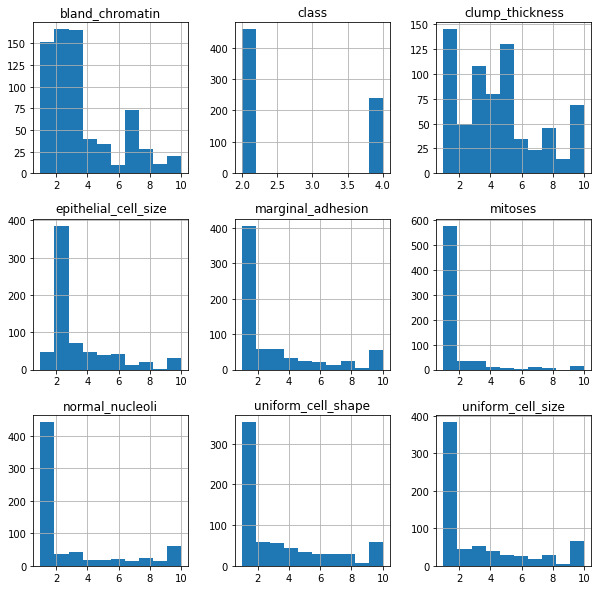

In [26]:
#data visualization
df.hist(figsize=(10,10))
plt.show()#histograms for each of the features

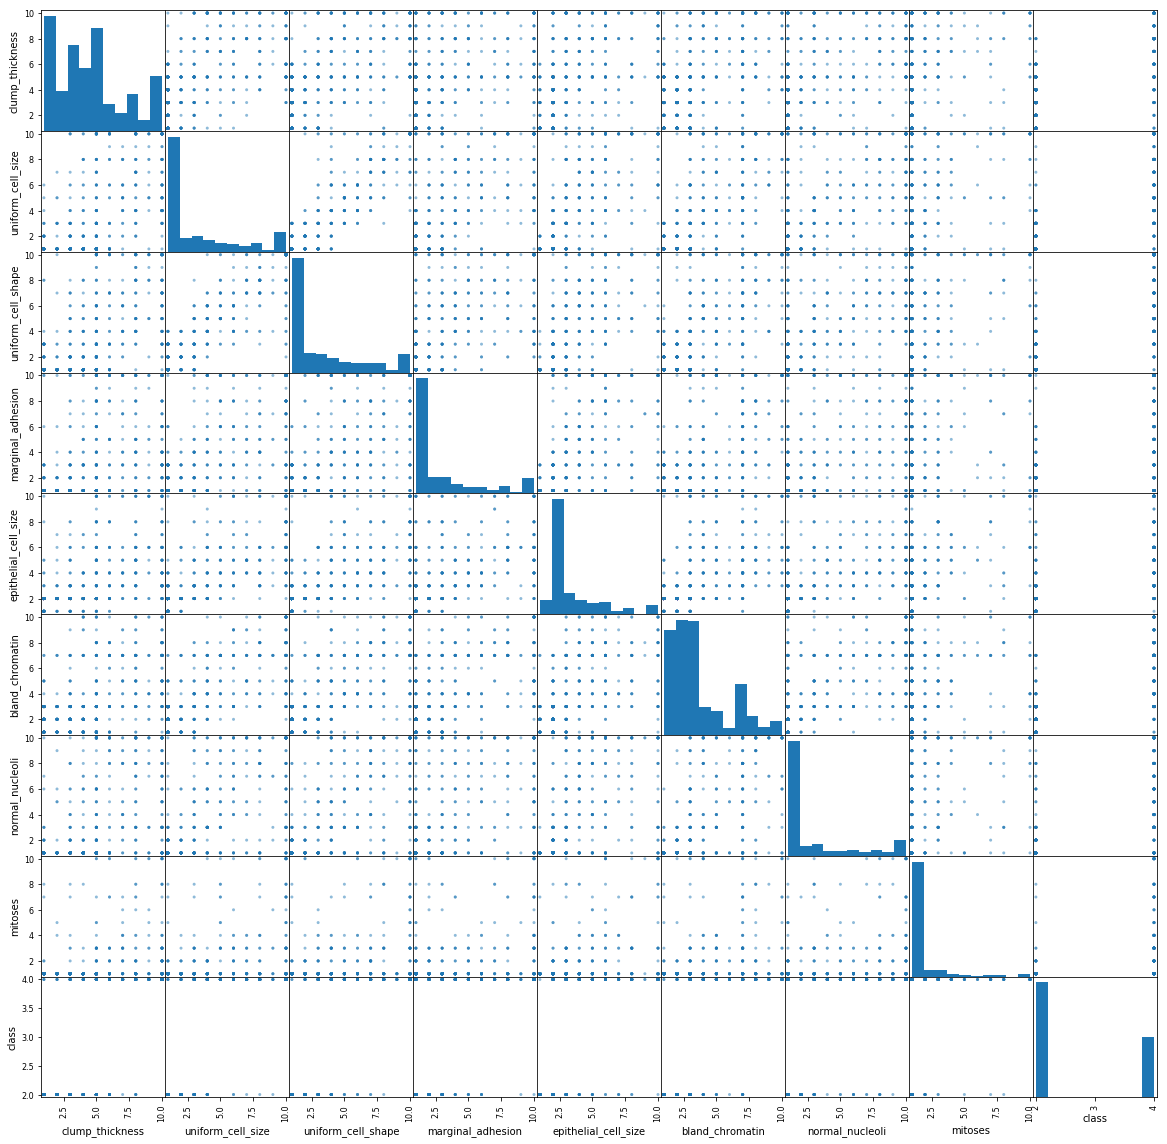

In [27]:
scatter_matrix(df,figsize=(20,20))
plt.show()# to figure out relationship between different features

In [28]:
#split data into X and y 
X = np.array(df.drop(['class'],1))
# print(X)
y = np.array(df['class'])
# print(y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)#for validation

In [30]:
#Add testing parameters
seed = 8
scoring = 'accuracy'

In [94]:
#We consider two models, SVM and KNN Classifers
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM',SVC(gamma='auto')))#gamma=scale not cool for this dataset


In [100]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 8, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print('{}: {} ({})'.format(name, cv_results.mean(), cv_results.std()))

KNN: 0.9750000000000001 (0.019884872724392936)
SVM: 0.9589026915113872 (0.01944434493548726)


In [101]:
#Make predictions now on the test split
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test,predictions))

KNN
0.9571428571428572
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        91
           4       0.94      0.94      0.94        49

   micro avg       0.96      0.96      0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

SVM
0.9571428571428572
              precision    recall  f1-score   support

           2       0.99      0.95      0.97        91
           4       0.91      0.98      0.94        49

   micro avg       0.96      0.96      0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140



In [97]:
clf = SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)
example = np.array([[4,3,2,1,1,2,3,4,1]])
#print(example.shape)
#example = example.reshape(len(example),-1)#turns example into column vector
#print(example.shape)
prediction = clf.predict(example)
print(prediction)

clf = KNeighborsClassifier(n_neighbors = 5)

clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)
example = np.array([[4,3,2,1,1,2,3,4,1]])
#print(example.shape)
#example = example.reshape(len(example),-1)#turns example into column vector
#print(example.shape)
prediction = clf.predict(example)
print(prediction)

0.9571428571428572
[2]
0.9571428571428572
[2]


C:\Users\SONY\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
